In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("sales_data.csv")

# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Sales Trend Over Time-line chart**

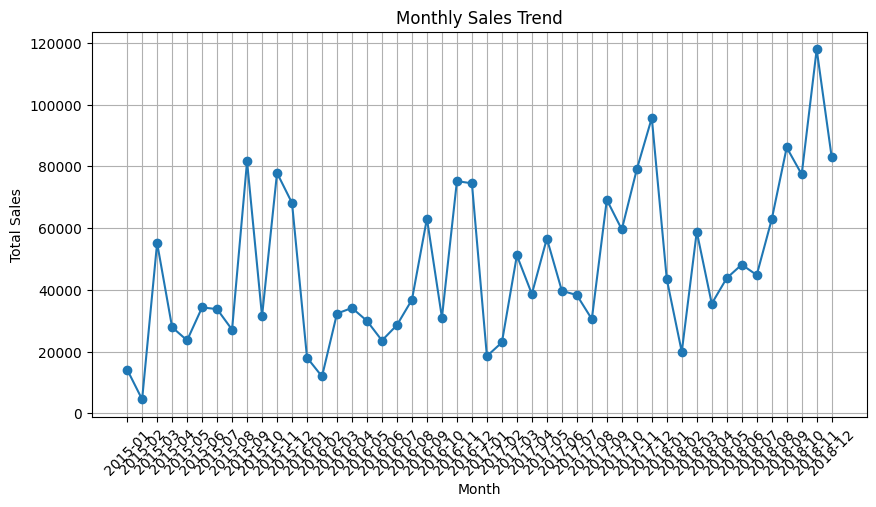

In [4]:
# Group sales by month
df["Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Sales"].sum()

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


**Top 10 Best- Selling Products-Bar chart**

C:\Users\DELL\AppData\Local\Temp\ipykernel_11716\1839751148.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


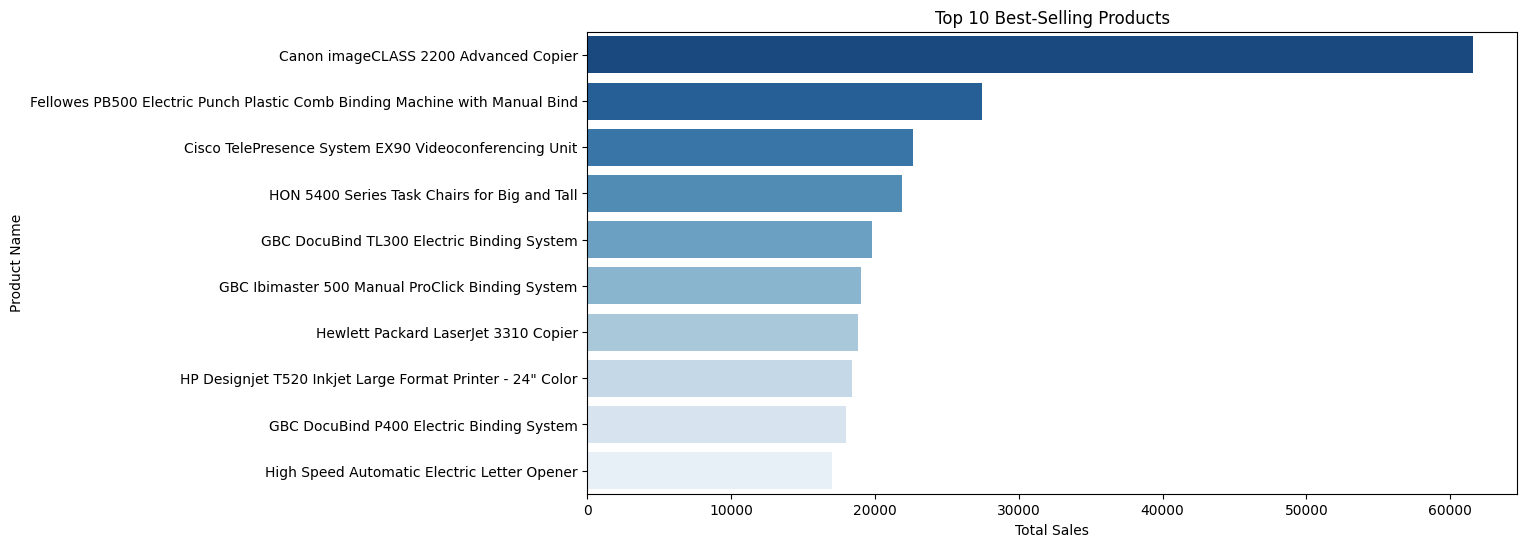

In [5]:
# Top 10 products by sales
top_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11716\4292365169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Greens_r")


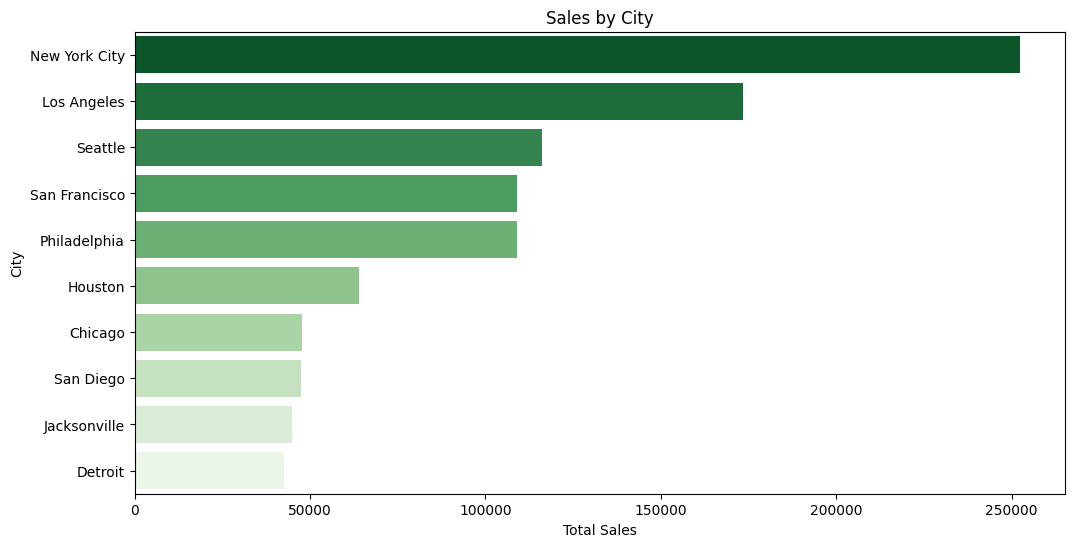

In [6]:
# Top 10 cities by sales
top_cities = df.groupby("City")["Sales"].sum().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Greens_r")
plt.title("Sales by City")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()


**Customer Segmentation-box plot**

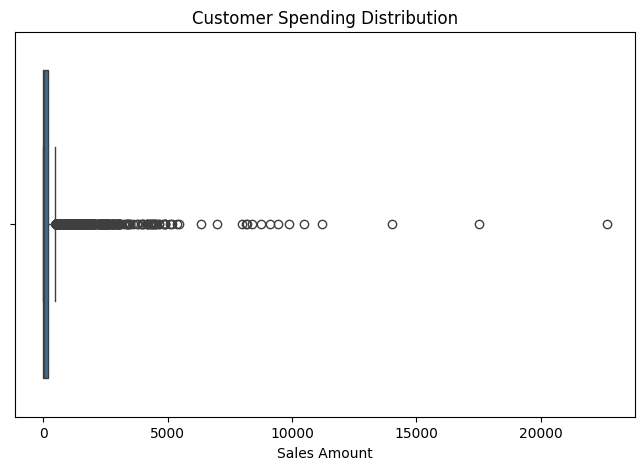

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Sales"])
plt.title("Customer Spending Distribution")
plt.xlabel("Sales Amount")
plt.show()
